In [4]:
import pandas as pd
import os, json
import datetime
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rc
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
fb_posts = pd.read_csv('/content/gdrive/My Drive/Data Visualisations/myposts.csv')
#fb timestamp is imported in unix format
#we need to convert this into a readable datetime 
#iterate through timestamps and convert individual rows 
fb_posts['timestamp'] = fb_posts['timestamp'].apply(lambda x: datetime.datetime.fromtimestamp(int(x)))
#create month, day, year and time columns
fb_posts['year'] = fb_posts.timestamp.dt.year
fb_posts['month'] = fb_posts.timestamp.dt.month
fb_posts['day'] = fb_posts.timestamp.dt.day
fb_posts['time'] = fb_posts.timestamp.dt.time

#we want to drop columns that don't contain information valuable for our analysis
#making the assumption that if 95% of the rows are NaN values, the column doesn't contain valuable info for the purposes of our analysis
#use dropna and specify threshhold of na values
fb_posts = fb_posts.dropna(thresh=len(fb_posts)*0.05, axis=1)


In [0]:
#use list(fb_posts) to id the remaining columns
fb_posts = fb_posts.drop(fb_posts.iloc[:,[1,4]], axis=1)

In [0]:
#rename column
fb_posts.rename(columns = {'data/0/post':'posts', 'attachments/0/data/0/external_context/url':'links'}, inplace=True)

In [0]:
fb_posts['title'] = fb_posts['title'].astype(str)

In [0]:
for x in ['link', 'post', 'status', 'timeline','recommend','books','reviewed','playlist','feeling','event','likes','listened','played','published','shared','was','followed','commented','song','responded','wants','invested','photo']:
    fb_posts.loc[fb_posts['title'].str.contains(x), 'title'] = x

In [0]:
#remove chart junk
removal = ['recommend','books','photo','reviewed','playlist','nan','feeling','event','likes','listened','played','published','was','followed','commented','song','responded','wants','invested']
fb_posts2= fb_posts[~fb_posts['title'].isin(removal)]

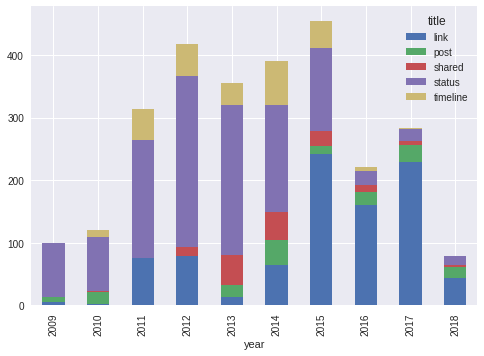

In [12]:
fb_posts2.groupby(['year','title']).size().unstack().plot.bar(stacked=True)

In [0]:
#we want to find the count of posts, status updates and link shares by year
nine = fb_posts2[fb_posts2['year']==2009].groupby('title').size()
ten = fb_posts2[fb_posts2['year']==2010].groupby('title').size()
eleven = fb_posts2[fb_posts2['year']==2011].groupby('title').size()
twelve = fb_posts2[fb_posts2['year']==2012].groupby('title').size()
thirteen = fb_posts2[fb_posts2['year']==2013].groupby('title').size()
fourteen = fb_posts2[fb_posts2['year']==2014].groupby('title').size()
fifteen = fb_posts2[fb_posts2['year']==2015].groupby('title').size()
sixteen = fb_posts2[fb_posts2['year']==2016].groupby('title').size()
seventeen = fb_posts2[fb_posts2['year']==2017].groupby('title').size()
eighteen = fb_posts2[fb_posts2['year']==2018].groupby('title').size()


In [0]:
a1 = lambda x: x/sum(nine)*100
a2 = lambda x: x/sum(ten)*100
a3 = lambda x: x/sum(eleven)*100
a4 = lambda x: x/sum(twelve)*100
a5 = lambda x: x/sum(thirteen)*100
a6 = lambda x: x/sum(fourteen)*100
a7 = lambda x: x/sum(fifteen)*100
a8 = lambda x: x/sum(sixteen)*100
a9 = lambda x: x/sum(seventeen)*100
a10 = lambda x: x/sum(eighteen)*100
nine = a1(nine)
ten = a2(ten)
eleven = a3(eleven) 
twelve = a4(twelve)
thirteen = a5(thirteen)
fourteen = a6(fourteen)
fifteen = a7(fifteen)
sixteen = a8(sixteen)
seventeen = a9(seventeen)
eighteen = a10(eighteen)

In [40]:
twelve

title
link        18.660287
shared       3.588517
status      65.550239
timeline    12.200957
dtype: float64

In [29]:
series = [pd.Series([nine, ten, eleven, twelve,thirteen], index=('link','post','shared','status','timeline'))]
series

[link        title
 link       6.060606
 post       8.080808
 ...
 post        title
 link         1.666667
 post        15.833...
 shared      title
 link        23.885350
 shared       0.318...
 status      title
 link        18.660287
 shared       3.588...
 timeline    title
 link         3.943662
 post         5.352...
 dtype: object]

In [0]:
my_names = [2009,2010,2011,2012,2013,2014,2015,2016,2017,2018]
cols = ['link', 'post','shared','timeline','status']

In [0]:
#why did i use concat over pd.series then pd.dataframe
ser = [nine, ten, eleven, twelve, thirteen, fourteen, fifteen, sixteen, seventeen, eighteen]
df = pd.concat(ser, axis=1, keys=my_names)

In [0]:
#remove all NaN values and replace with 0
df[2009].fillna(0, inplace=True)
df[2011].fillna(0, inplace=True)
df[2012].fillna(0, inplace=True)

In [0]:
df1 = df.pivot(index=df.columns, columns=df.rows, values=df.values)


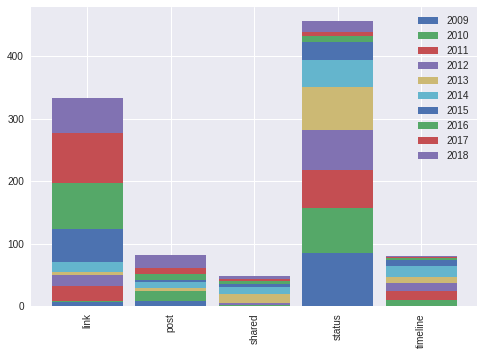

In [66]:

df.plot(kind='bar', stacked=True, width=0.85)


In [72]:
#we need to invert axes, currently rows are the x-axis and years the y-axis
df.plot(x= df.columns, y= df.values, kind='bar', stacked=True, width=0.85)

ValueError: ignored

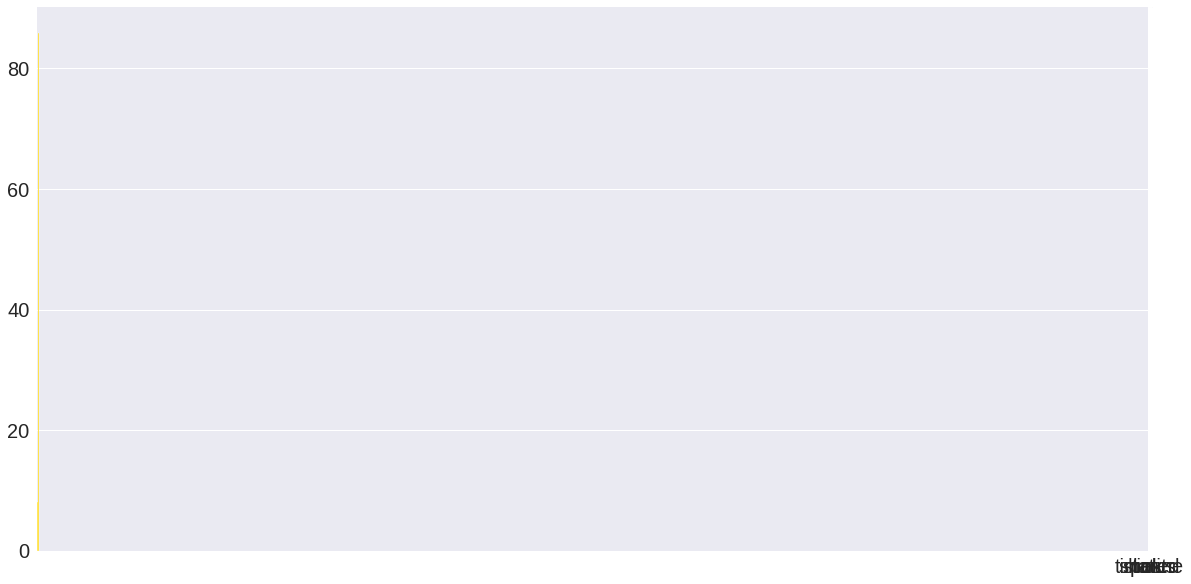

In [252]:
barWidth = 0.85
plt.bar(list(nine.index),nine.values, color='#FFD700',edgecolor='white',width=barWidth)
plt.xticks(range(2009,2019))
fig = plt.gcf()
fig.set_size_inches(20,10)
plt.tick_params(labelsize=20)
plt.show()

In [107]:
yearly_links

year
2009     0.655738
2010     0.218579
2011     8.196721
2012     8.524590
2013     1.530055
2014     7.103825
2015    26.338798
2016    17.595628
2017    25.027322
2018     4.808743
dtype: float64

In [0]:
yearly_posts

year
2009     8
2010    19
2013    19
2014    40
2015    13
2016    20
2017    27
2018    17
dtype: int64

In [0]:
yearly_links = fb_posts[fb_posts]fb_posts.groupby('year').size()
df_max = df[df['Element'] == 'TMAX'].groupby('Date').aggregate({'Data_Value':np.average})


year
2009     99
2010    120
2011    322
2012    487
2013    447
2014    434
2015    499
2016    229
2017    297
2018     95
dtype: int64

In [0]:
#posts and link shares by year
yearly_links = df
yearly_posts = 


,timestamp,title,posts,links,year,month,day,time
0,2018-12-21 12:28:13,Emmanuel Sibanda shared a post.,NaN,NaN,2018,12,21,12:28:13
1,2018-12-20 07:10:16,Emmanuel Sibanda shared a post.,Interesting take on South African history,NaN,2018,12,20,07:10:16
2,2018-12-20 07:02:50,Emmanuel Sibanda shared a post.,NaN,NaN,2018,12,20,07:02:50
3,2018-12-18 17:21:57,Emmanuel Sibanda shared a link.,"""There is nothing like that moment when you cr...",https://www.ft.com/content/675071ac-fcc0-11e3-...,2018,12,18,17:21:57
4,2018-12-12 09:39:01,Emmanuel Sibanda updated his status.,"""I teach you the overman. Man is something tha...",NaN,2018,12,12,09:39:01
5,2018-12-07 20:55:48,Emmanuel Sibanda shared a link.,Finally!,https://www.youtube.com/attribution_link?a=rTT...,2018,12,7,20:55:48
6,2018-12-07 06:48:00,Emmanuel Sibanda shared a link.,NaN,https://www.linkedin.com/pulse/visualising-sou...,2018,12,7,06:48:00
7,2018-12-05 11:18:36,Emmanuel Sibanda updated his status.,Johann Rupert's interview is a good example of...,NaN,2018,12,5,11:18:36
8,2018-11-28 09:58:32,NaN,NaN,NaN,2018,11,28,09:58:32
9,2018-11-23 12:41:56,Emmanuel Sibanda updated his status.,So if a person working in Zimbabwe earns over ...,NaN,2018,11,23,12:41:56


In [0]:
fb_posts

In [0]:
100*0.05

5.0

In [0]:
for index, js in enumerate(json_files):
    with open(os.path.join(path_to_json, js)) as json_file:
        json_text = json.load(json_file)
        participant = json_text['participant']
        messages = json_text['messages']
        title = json_text['title']
        active = json_text['is_still_participant']
        threadtype = json_text['thread_type']
        threadpath = json_text['thread_path']
        jsons_data.loc[index]=[participant,messages,title,active,threadtype,threadpath,skewness,rmsOriginalSignal, rmsFiltSignal_01, rmsFiltSignal_02, rmsFiltSignal_03]


In [0]:
import json
import pandas as pd
with open("/content/gdrive/My Drive/Data Visualisations/Messages/message.json") as file:
  data = json.load(file.read())
data

In [0]:
df = pd.read_json("/content/gdrive/My Drive/Data Visualisations/Messages/message.json", lines = True)
df

In [0]:
data= pd.read_json('/content/gdrive/My Drive/Data Visualisations/Messages/message3.json')

In [0]:
data